In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import datasets, linear_model
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [5]:
df = pd.read_csv('/content/drive/My Drive/Heart.csv')

In [6]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


**Remove Nan Values**

In [7]:
count_nan = df['Thal'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 2


In [8]:
df['Thal'] = df['Thal'].replace(np.nan, 0)

In [9]:
count_nan = df['Ca'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 4


In [10]:
df['Ca'] = df['Ca'].replace(np.nan, 0)

In [11]:
df.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

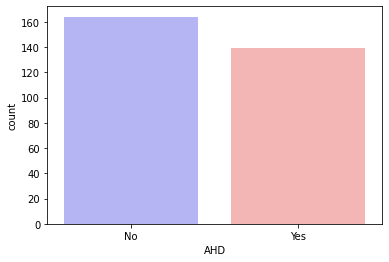

In [12]:
sns.countplot(x="AHD", data=df, palette="bwr")
plt.show()

In [13]:
countNoDisease = len(df[df.AHD == 0])
countHaveDisease = len(df[df.AHD == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.AHD))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.AHD))*100)))

Percentage of Patients Haven't Heart Disease: 0.00%
Percentage of Patients Have Heart Disease: 0.00%


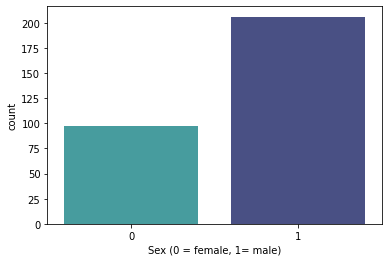

In [14]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [15]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Percentage of Female Patients: 32.01%
Percentage of Male Patients: 67.99%


Creating Dummy Variables

In [16]:
a = pd.get_dummies(df['ChestPain'], prefix = "ChestPain")
b = pd.get_dummies(df['Thal'], prefix = "Thal")
c = pd.get_dummies(df['Slope'], prefix = "Slope")

In [17]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,1,0,0,0,1,0,1,0,0


In [18]:
df = df.drop(columns = ['ChestPain', 'Thal', 'Slope'])
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,145,233,1,2,150,0,2.3,0.0,No,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,160,286,0,2,108,1,1.5,3.0,Yes,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2.0,Yes,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,130,250,0,0,187,0,3.5,0.0,No,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,130,204,0,2,172,0,1.4,0.0,No,0,0,1,0,0,0,1,0,1,0,0


In [19]:
y = df.AHD.values
x_data = df.drop(['AHD'], axis = 1)

In [182]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [184]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


## **KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [26]:
#show first 5 model predictions on the test data
knn.predict(x_test)#[0:5]

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [28]:
knn.score(x_test, y_test)

0.7377049180327869

In [33]:
#Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.76       0.64       0.79166667 0.70833333 0.79166667 0.875
 0.625      0.91666667 0.70833333 0.79166667]
cv_scores mean:0.7608333333333333


In [40]:
from sklearn.model_selection import KFold
#print (X.shape)
kf = KFold(n_splits=10)
for train, test in kf.split(x_data):
    print("%s %s" % (train, test))

[ 31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 27

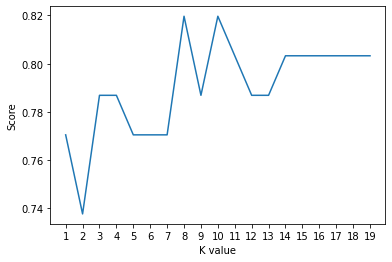

Maximum KNN Score is 81.97%


In [44]:
# try ro find best k value
scoreList = []
accuracies = {}
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## KNN Using Different K values

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 8)
# Fit the classifier to the data
knn.fit(x_train,y_train)
knn.predict(x_test)#[0:5]
knn.score(x_test, y_test)

0.819672131147541

In [51]:
#Cross 
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.76       0.68       0.875      0.83333333 0.79166667 0.91666667
 0.70833333 0.91666667 0.75       0.91666667]
cv_scores mean:0.8148333333333333


In [46]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(x_train,y_train)
knn.predict(x_test)#[0:5]
knn.score(x_test, y_test)

0.7868852459016393

In [49]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 13)
# Fit the classifier to the data
knn.fit(x_train,y_train)
knn.predict(x_test)#[0:5]
knn.score(x_test, y_test)

0.7868852459016393

Confusion Matrix For K value 8


In [129]:
# Predicted values
knn8 = KNeighborsClassifier(n_neighbors = 8)
knn8.fit(x_train, y_train)
y_head_knn = knn8.predict(x_test)

knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(x_train, y_train)
y_head_knn1 = knn2.predict(x_test)


In [130]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_knn2 = confusion_matrix(y_test,y_head_knn1)


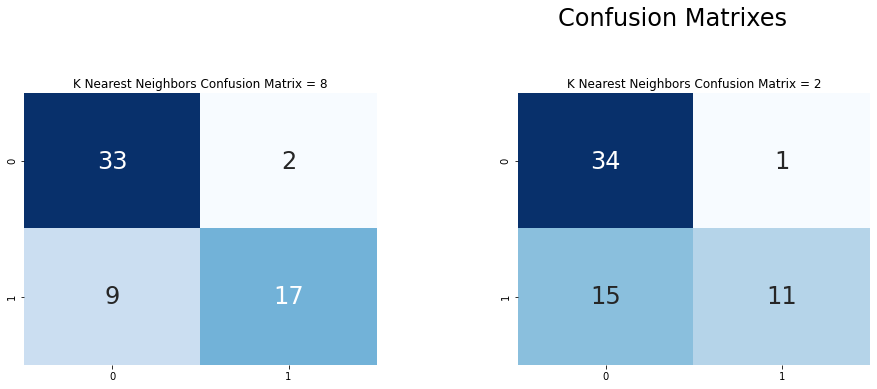

In [134]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix = 8")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix = 2")
sns.heatmap(cm_knn2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

## Precision, Recall, F1 and Accuracy score

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_head_knn))
print(classification_report(y_test,y_head_knn1))

              precision    recall  f1-score   support

          No       0.79      0.94      0.86        35
         Yes       0.89      0.65      0.76        26

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61

              precision    recall  f1-score   support

          No       0.69      0.97      0.81        35
         Yes       0.92      0.42      0.58        26

    accuracy                           0.74        61
   macro avg       0.81      0.70      0.69        61
weighted avg       0.79      0.74      0.71        61



# Naive Baiyes

In [96]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracies = {}
acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 78.69%


In [99]:
#Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np
accuracies_nb = cross_val_score(estimator=nb, X=x_train, y=y_train, cv=10)
print(accuracies_nb)
print("NB Average accuracy: ", accuracies_nb.mean())

[0.84       0.76       0.875      0.66666667 0.91666667 0.875
 0.83333333 0.875      0.75       0.875     ]
NB Average accuracy:  0.8266666666666665


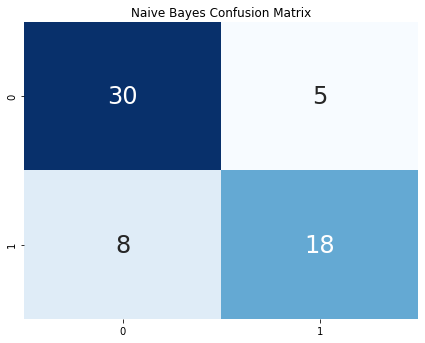

In [103]:
#Confusion Matrix
plt.figure(figsize=(24,12))
y_head_nb = nb.predict(x_test)
cm_nb = confusion_matrix(y_test,y_head_nb)
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_head_nb))

              precision    recall  f1-score   support

          No       0.79      0.86      0.82        35
         Yes       0.78      0.69      0.73        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



# Linear Discriminant Analysis

In [176]:
#Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=1,random_state=1)
scores = cross_val_score(model,X=x_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=-1 )
# summarize result
print(scores)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.84       0.84       0.79166667 0.875      0.91666667 0.79166667
 0.875      0.875      0.83333333 0.875     ]
Mean Accuracy: 0.851 (0.038)


In [190]:
#Accuracy Score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn import metrics
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
accuracies = {}
acc = lda.score(x_test,y_test)*100
accuracies['Linear Discriminant'] = acc
print("Accuracy of Linear Discriminant: {:.2f}%".format(acc))

Accuracy of Linear Discriminant: 80.33%


## Controlling the posterior probabilty threshold for LDA


In [192]:
model_lda= LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [198]:
y_prob = model_lda.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.6, 1, 0) # This will threshold the probabilities to give class predictions.
model_lda.score(x_test, y_pred)
print(y_pred)

[0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [199]:
y_prob = model_lda.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_lda.score(x_test, y_pred)
print(y_pred)

[0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [200]:
y_prob = model_lda.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.8, 1, 0) # This will threshold the probabilities to give class predictions.
model_lda.score(x_test, y_pred)
print(y_pred)

[0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [201]:
y_prob = model_lda.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.4, 1, 0) # This will threshold the probabilities to give class predictions.
model_lda.score(x_test, y_pred)
print(y_pred)

[0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [202]:
y_prob = model_lda.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.7, 1, 0) # This will threshold the probabilities to give class predictions.
model_lda.score(x_test, y_pred)
print(y_pred)

[0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


**Confusion Matrix**

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(x_test))

array([[31,  4],
       [ 8, 18]])

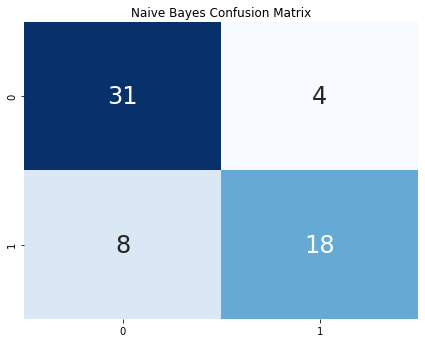

In [118]:
#Confusion Matrix
plt.figure(figsize=(24,12))
y_head_model = model.predict(x_test)
cm_nb = confusion_matrix(y_test,y_head_model)
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_head_model))

              precision    recall  f1-score   support

          No       0.79      0.89      0.84        35
         Yes       0.82      0.69      0.75        26

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61

